In [9]:
import numpy as np
import pandas as pd


In [10]:
train = pd.read_csv('./data/dacon_g/train.csv', index_col='id')
test = pd.read_csv('./data/dacon_g/test.csv', index_col='id')
sample_submission = pd.read_csv('./data/dacon_g/sample_submission.csv', index_col='id')

In [11]:
train_tt = train.copy()
train_rev = train.drop(columns=["type","fiberID"])

cut_psf = train_rev.loc[:,["psfMag_u","psfMag_g","psfMag_r","psfMag_i","psfMag_z"]]
cut_psf
cut_fib = train_rev.loc[:,["fiberMag_u","fiberMag_g","fiberMag_r","fiberMag_i","fiberMag_z"]]
cut_fib
cut_pet = train_rev.loc[:,["petroMag_u","petroMag_g","petroMag_r","petroMag_i","petroMag_z"]]
cut_pet
cut_mod= train_rev.loc[:,["modelMag_u","modelMag_g","modelMag_r","modelMag_i","modelMag_z"]]
cut_mod


,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
id,,,,,
0,22.749241,21.465534,21.364187,21.020605,21.147340
1,21.492955,20.758527,20.753925,20.693389,20.512314
2,17.818063,16.697434,16.641249,16.660177,16.688928
3,20.770711,20.001699,19.889798,19.758113,19.552855
4,24.877052,23.147993,21.475342,19.487330,18.375655
...,...,...,...,...,...
199986,20.783295,20.326879,20.014046,20.061940,19.862513
199987,26.921903,21.952440,19.776321,18.990039,18.528306
199988,24.503460,21.897599,20.420524,18.443126,17.331724


In [12]:
train[train["type"] == "SKY"].max()

type              SKY
fiberID           636
psfMag_u      27.1071
psfMag_g      26.4033
psfMag_r      26.3098
psfMag_i      26.1261
psfMag_z      24.7509
fiberMag_u    26.6963
fiberMag_g     26.642
fiberMag_r    26.5666
fiberMag_i    26.4142
fiberMag_z    24.8799
petroMag_u    35.9323
petroMag_g    31.9211
petroMag_r    68.7328
petroMag_i    48.0669
petroMag_z    29.8826
modelMag_u    29.0713
modelMag_g    27.3865
modelMag_r    27.8036
modelMag_i    28.2181
modelMag_z    27.7172
dtype: object

In [13]:

def process_outlier(tmp_df, tmp):
    q1, q3 = np.percentile(tmp, [25, 75])
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr
    mask_upper = tmp > upper
    mask_lower = tmp < lower
    tmp_df = tmp_df.loc[~(mask_upper | mask_lower)]    # not 붙으면 가운데가 &로 변하니까 주의
    return tmp_df


In [14]:
def process_outlier(tmp_df, tmp):
    q1, q3 = np.percentile(tmp, [0.01, 99.99])
    iqr = q3 - q1
    upper = 50
    lower = 0 
    mask_upper = tmp > upper
    mask_lower = tmp < lower
    tmp_df = tmp_df.loc[~(mask_upper | mask_lower)]    # not 붙으면 가운데가 &로 변하니까 주의
    return tmp_df

In [15]:
for i in train_rev.columns:
    train_tt = process_outlier(train_tt,train_tt[i])

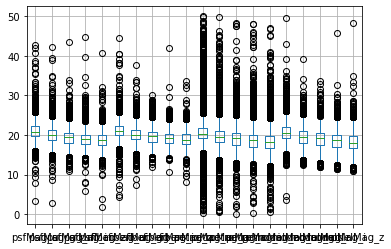

In [16]:
train_tt.iloc[:,2:].boxplot()

In [ ]:
t

In [17]:
train.groupby("type").count()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
type,,,,,,,,,,,,,,,,,,,,,
GALAXY,37347,37347,37347,37347,37347,37347,37347,37347,37347,37347,...,37347,37347,37347,37347,37347,37347,37347,37347,37347,37347
QSO,49680,49680,49680,49680,49680,49680,49680,49680,49680,49680,...,49680,49680,49680,49680,49680,49680,49680,49680,49680,49680
REDDEN_STD,14618,14618,14618,14618,14618,14618,14618,14618,14618,14618,...,14618,14618,14618,14618,14618,14618,14618,14618,14618,14618
ROSAT_D,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580,...,6580,6580,6580,6580,6580,6580,6580,6580,6580,6580
SERENDIPITY_BLUE,21760,21760,21760,21760,21760,21760,21760,21760,21760,21760,...,21760,21760,21760,21760,21760,21760,21760,21760,21760,21760
SERENDIPITY_DISTANT,4654,4654,4654,4654,4654,4654,4654,4654,4654,4654,...,4654,4654,4654,4654,4654,4654,4654,4654,4654,4654
SERENDIPITY_FIRST,7132,7132,7132,7132,7132,7132,7132,7132,7132,7132,...,7132,7132,7132,7132,7132,7132,7132,7132,7132,7132
SERENDIPITY_MANUAL,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
SERENDIPITY_RED,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562,...,2562,2562,2562,2562,2562,2562,2562,2562,2562,2562


In [10]:
train_tt.groupby("type").count()

,fiberID,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,...,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
type,,,,,,,,,,,,,,,,,,,,,
GALAXY,37240,37240,37240,37240,37240,37240,37240,37240,37240,37240,...,37240,37240,37240,37240,37240,37240,37240,37240,37240,37240
QSO,49624,49624,49624,49624,49624,49624,49624,49624,49624,49624,...,49624,49624,49624,49624,49624,49624,49624,49624,49624,49624
REDDEN_STD,14614,14614,14614,14614,14614,14614,14614,14614,14614,14614,...,14614,14614,14614,14614,14614,14614,14614,14614,14614,14614
ROSAT_D,6501,6501,6501,6501,6501,6501,6501,6501,6501,6501,...,6501,6501,6501,6501,6501,6501,6501,6501,6501,6501
SERENDIPITY_BLUE,21750,21750,21750,21750,21750,21750,21750,21750,21750,21750,...,21750,21750,21750,21750,21750,21750,21750,21750,21750,21750
SERENDIPITY_DISTANT,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652,...,4652,4652,4652,4652,4652,4652,4652,4652,4652,4652
SERENDIPITY_FIRST,7119,7119,7119,7119,7119,7119,7119,7119,7119,7119,...,7119,7119,7119,7119,7119,7119,7119,7119,7119,7119
SERENDIPITY_MANUAL,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
SERENDIPITY_RED,2557,2557,2557,2557,2557,2557,2557,2557,2557,2557,...,2557,2557,2557,2557,2557,2557,2557,2557,2557,2557


In [18]:
train_tt.count()

type          199668
fiberID       199668
psfMag_u      199668
psfMag_g      199668
psfMag_r      199668
psfMag_i      199668
psfMag_z      199668
fiberMag_u    199668
fiberMag_g    199668
fiberMag_r    199668
fiberMag_i    199668
fiberMag_z    199668
petroMag_u    199668
petroMag_g    199668
petroMag_r    199668
petroMag_i    199668
petroMag_z    199668
modelMag_u    199668
modelMag_g    199668
modelMag_r    199668
modelMag_i    199668
modelMag_z    199668
dtype: int64

In [19]:
train_tt.to_csv("./data/dacon_g/train_199668.csv")

In [ ]:
cut_psf["psfMag_u"]
np.percentile(cut_psf["psfMag_u"], [0.1, 99.9])

In [ ]:
27.368455 + ((27.368455 - 15.9757)*1.5)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

train_rev

In [ ]:
a = MinMaxScaler().fit_transform(train_rev)
b = RobustScaler().fit_transform(train_rev)

a[0]
b[0]

In [ ]:
train_rev["psfMag_u"]